# Descriptive Socioeconomic Graphs and OD Matrices
Delft University of Technology

Faculty of Technology, Policy and Management

Policy Analysis Section

# 1. Import all required module

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
from __future__ import division

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

#Modules developed by TU Delft team for this project
from bangladesh_network_lib import network_prep as net_p
from bangladesh_network_lib import network_visualization as net_v
from bangladesh_network_lib import od_prep as od_p
from bangladesh_network_lib import weighted_betweenness as betw_w

# 2. File Preparation

In [2]:
filepath = os.getcwd()
network = filepath+'\\model_input_data\\road_rmms_v9.shp'
centroid = filepath+'\\model_input_data\\BGD_Districtdata_Citycentroid_level2_v02.shp'


gdf_points, gdf_node_pos, gdf = net_p.prepare_centroids_network(centroid, network)

In [7]:
#simplify the graph
G2_new = net_p.gdf_to_simplified_multidigraph(gdf_node_pos, gdf, undirected=True)

In [8]:
#change to simple Graph object type
G2_new_tograph = net_p.multigraph_to_graph(G2_new)

In [9]:
#change the simplified transport network back to GeoDataFrame
gdf2 = net_p.graph_to_df(G2_new_tograph)

In [6]:
filepath = os.getcwd()
adm_csv = filepath+'\\model_input_data\\District_level_data_v6.csv'
adm_shp = filepath+'\\model_input_data\\BGD_adm2.shp'

#Save the following information from csv to DataFrame
district_gdf2 = net_p.prepare_adm_background(adm_csv, adm_shp, ['Code', 'Population', 'Population_M',
                                                               'Garment_ton', 'Steel_ton', 'Jute_ton', 'Textile_ton',
                                                               'Rice_ton', 'Wheat_ton', 'Fruits_ton', 'Potatoes_ton',
                                                               'Sugar_ton', 'Bricks_ton', 'RawJute_loc_ton', 'Total_export',
                                                               'Jute_mill', 'Flour_mill', 'Tot_Garment_Factory', 'Household',
                                                               'Land_throughput'])

C:\Users\Lenovo\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [7]:
#embed district data to gdf_points

#read district data
district_data = pd.read_csv(adm_csv)

#rename to HASC_2
district_data.rename(columns={'Code':'HASC_2'}, inplace=True)

#merge them
gdf_points = pd.merge(gdf_points,district_data,on='HASC_2',how='outer')

# 3. OD Matrices Preparation

In [9]:
#export OD
prod_lists = ['Garment_exp_ton', 'Steel_exp_ton', 'Jute_exp_ton', 'Textile_exp_ton', 
              'Rice_exp_ton','Wheat_exp_ton', 'Fruits_exp_ton', 'Potatoes_exp_ton', 'Sugar_exp_ton', 'Bricks_exp_ton']
attr_driver='Total_export'

OD_export_dict = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, 
                                       attr_driver = attr_driver, dist_deterrence = det_func)

In [10]:
OD_export = OD_export_dict[OD_export_dict.keys()[0]]
for i in range(len(OD_export_dict)-1):
    OD_export = OD_export +  OD_export_dict[OD_export_dict.keys()[i+1]]

In [11]:
#export OD
prod_lists = ['Garment_exp_ton', 'Steel_exp_ton', 'Jute_exp_ton', 'Textile_exp_ton', 
              'Rice_exp_ton','Wheat_exp_ton', 'Fruits_exp_ton', 'Potatoes_exp_ton', 'Sugar_exp_ton', 'Bricks_exp_ton']
attr_driver='Land_exp_ton'

OD_land_export_dict = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, 
                                       attr_driver = attr_driver, dist_deterrence = det_func)

OD_land_export = OD_land_export_dict[OD_land_export_dict.keys()[0]]
for i in range(len(OD_land_export_dict)-1):
    OD_land_export = OD_land_export +  OD_land_export_dict[OD_land_export_dict.keys()[i+1]]

In [12]:
#local trade OD    
    
#first for products which attraction is population
prod_lists = ['Garment_loc_ton', 'Steel_loc_ton','Jute_loc_ton',
              'Rice_loc_ton', 'Fruits_loc_ton', 'Potatoes_loc_ton', 'Sugar_loc_ton']
attr_driver='Population_x'
OD_local_dict1 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, 
                                       attr_driver = attr_driver, dist_deterrence = det_func)

#next for raw jute
prod_lists = ['RawJute_loc_ton']
attr_driver='Jute_mill'
OD_local_dict2 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, 
                                       attr_driver = attr_driver, dist_deterrence = det_func)

#next for wheat
prod_lists = ['Wheat_loc_ton']
attr_driver='Flour_mill'
OD_local_dict3 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, 
                                       attr_driver = attr_driver, dist_deterrence = det_func)

#next for textile
prod_lists = ['Textile_loc_ton']
attr_driver='Tot_Garment_Factory'
OD_local_dict4 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, 
                                       attr_driver = attr_driver, dist_deterrence = det_func)

#last for bricks
prod_lists = ['Bricks_loc_ton']
attr_driver='Household'
OD_local_dict5 = od_p.all_ods_creation(gdf_points = gdf_points, prod_lists = prod_lists, 
                                       attr_driver = attr_driver, dist_deterrence = det_func)

In [13]:
#Combine all local OD
OD_local1 = OD_local_dict1[OD_local_dict1.keys()[0]]
for i in range(len(OD_local_dict1)-1):
    OD_local1 = OD_local1 +  OD_local_dict1[OD_local_dict1.keys()[i+1]]
    
OD_local2 = OD_local_dict2[OD_local_dict2.keys()[0]]

OD_local3 = OD_local_dict3[OD_local_dict3.keys()[0]]

OD_local4 = OD_local_dict4[OD_local_dict4.keys()[0]]

OD_local5 = OD_local_dict5[OD_local_dict5.keys()[0]]

OD_local_all= OD_local1 + OD_local2 + OD_local3 + OD_local4 + OD_local5

In [14]:
#Create OD_all
OD_all = OD_local_all + OD_export

In [15]:
OD_all.sum().sum()

60279604.695455134

In [24]:
OD_play = OD_all.copy()
gdf_points_play = gdf_points.copy()

In [25]:
node_division_dict = dict(zip(list(gdf_points_play['Node']), list(gdf_points_play['Division'])))

In [26]:
OD_play.index = [node_division_dict[x] for x in OD_play.columns]
OD_play.columns = [node_division_dict[x] for x in OD_play.columns]

In [27]:
OD_play = OD_play.groupby(OD_play.index).sum().groupby(OD_play.columns, axis=1).sum()

# 4. Heatmap for OD

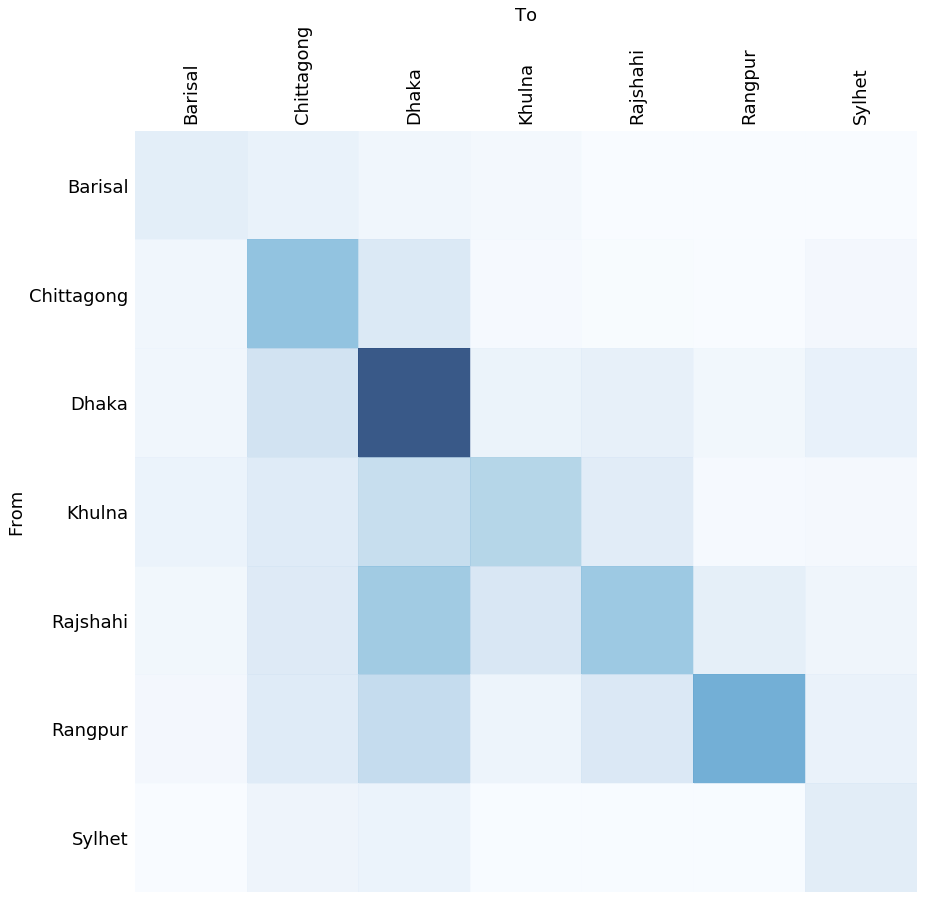

In [28]:
net_v.plot_od_heatmap(OD_df = OD_local_all, gdf_points = gdf_points, division=True)
plt.savefig('OD_local_all_division.png', dpi=400)

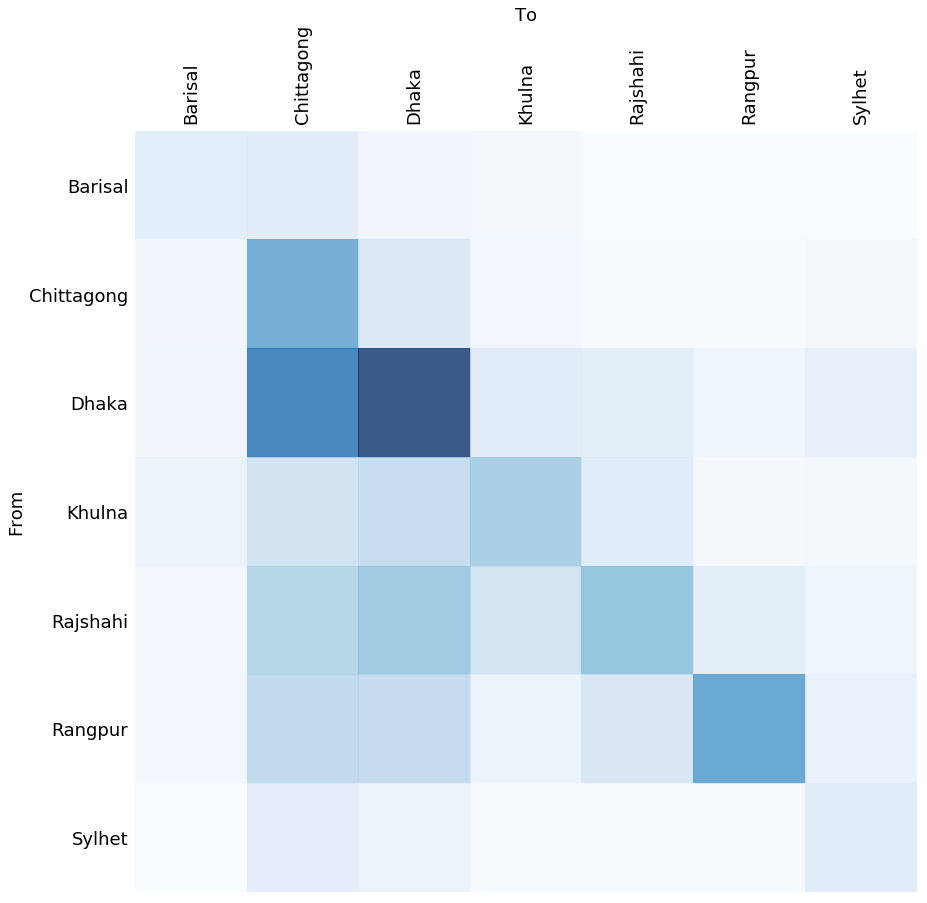

In [29]:
net_v.plot_od_heatmap(OD_df = OD_all, gdf_points = gdf_points, division=True)
plt.savefig('OD_all_division.png', dpi=400)

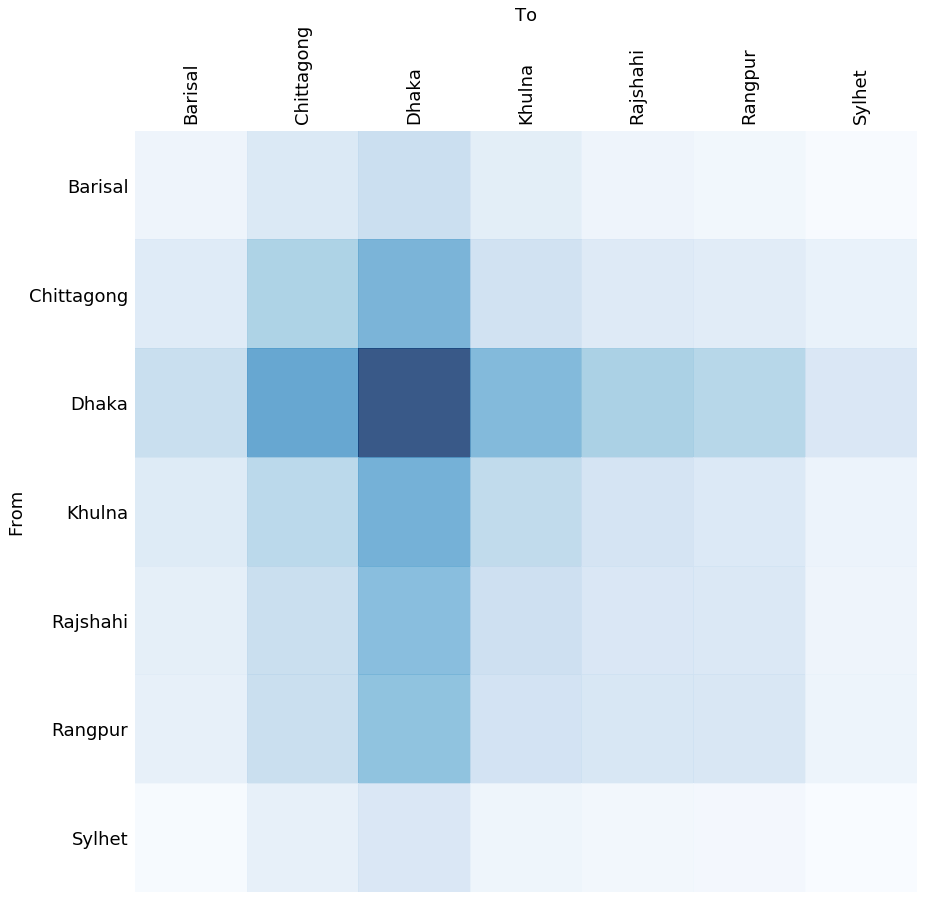

In [30]:
net_v.plot_od_heatmap(OD_df = OD_all, gdf_points = gdf_points, log=True, logn=5, division=True)
plt.savefig('OD_all_log5_division.png', dpi=400)

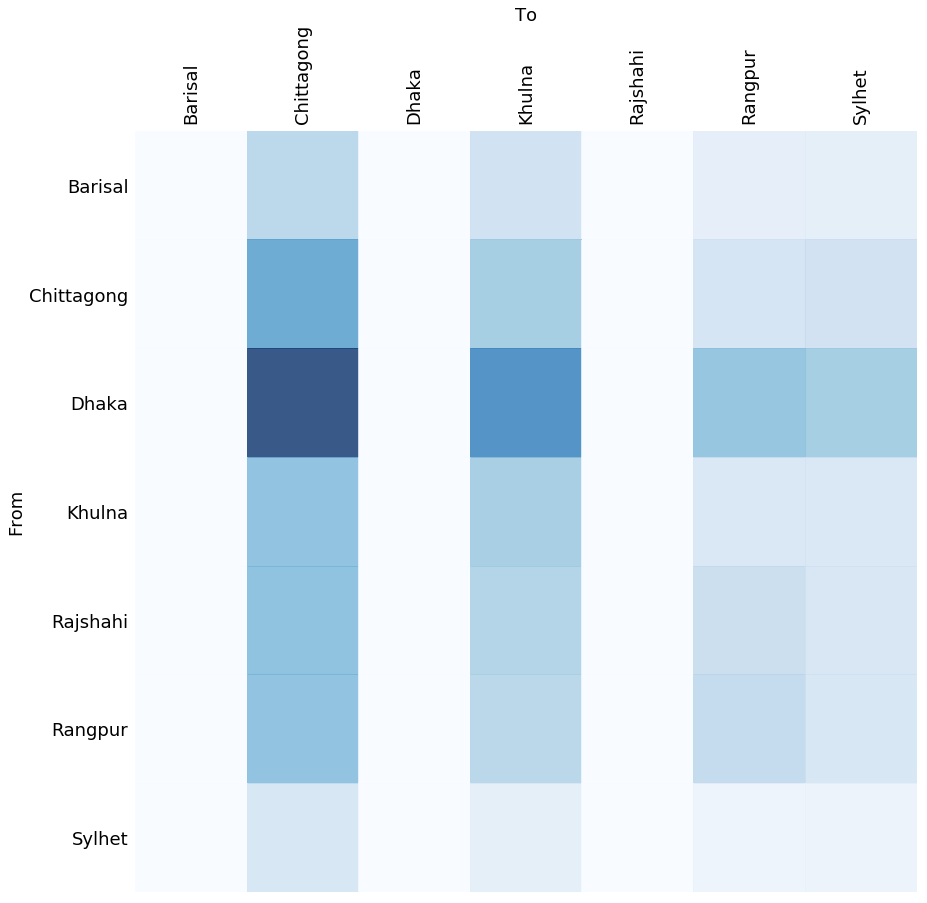

In [31]:
net_v.plot_od_heatmap(OD_df = OD_land_export, gdf_points = gdf_points, log=True, logn=10, division=True)
plt.savefig('OD_land_export_log10_division.png', dpi=400)

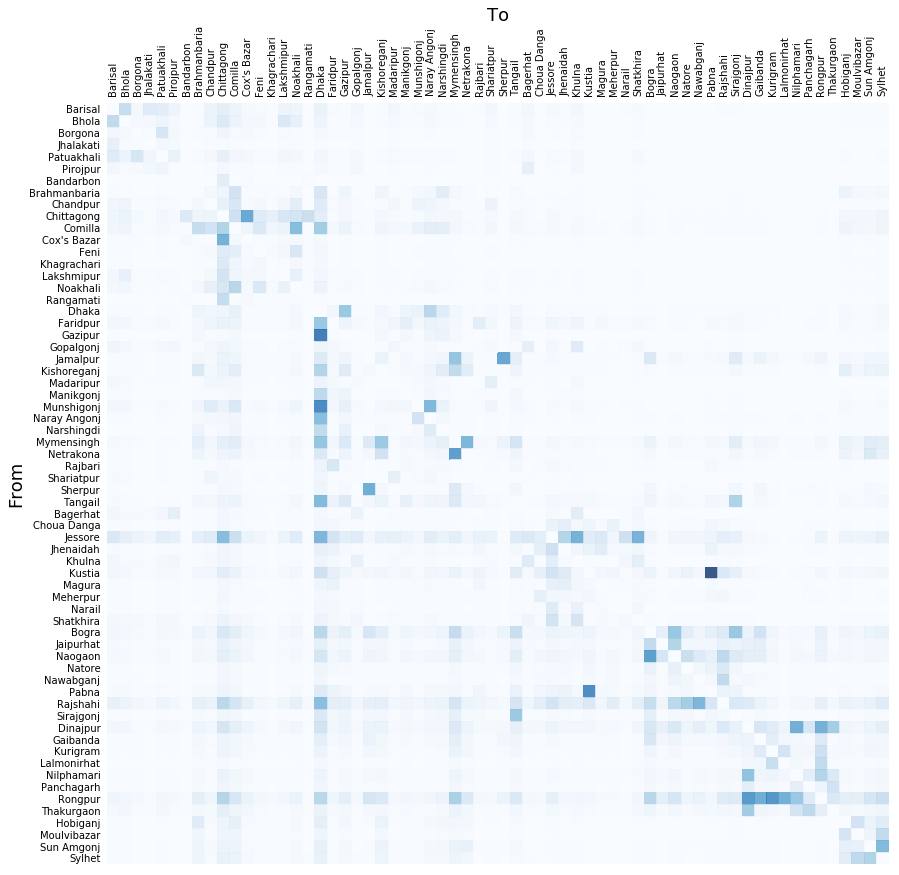

In [32]:
net_v.plot_od_heatmap(OD_df = OD_local_all, gdf_points = gdf_points)
plt.savefig('OD_local_all.png', dpi=400)

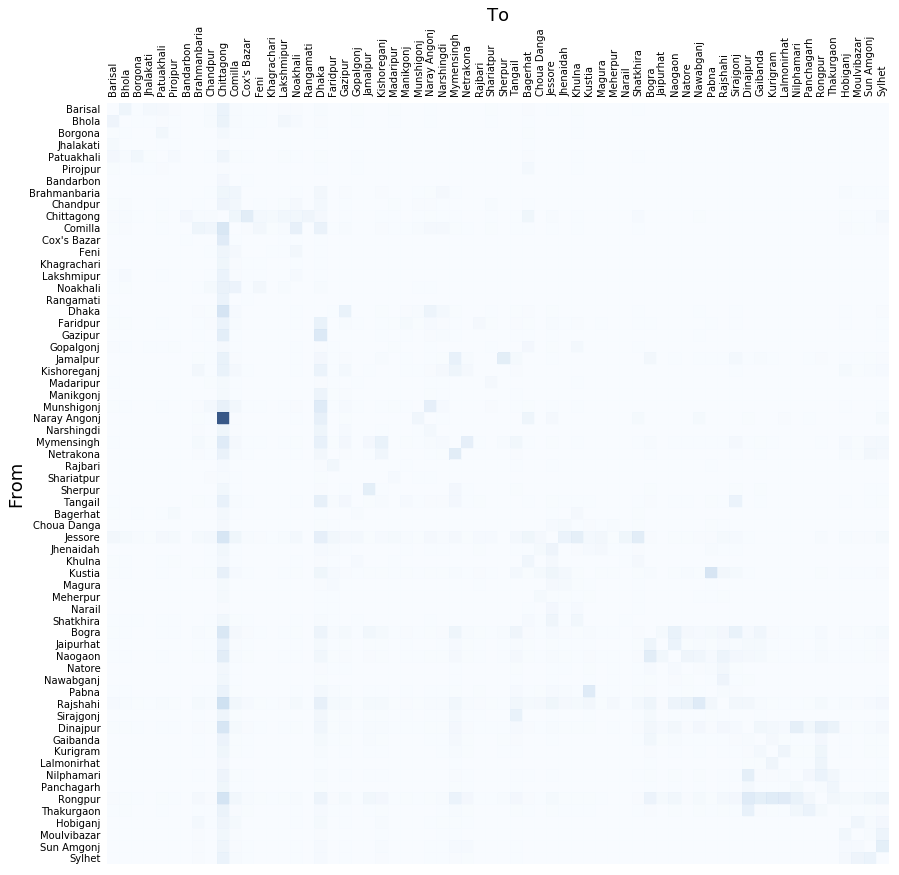

In [33]:
net_v.plot_od_heatmap(OD_df = OD_all, gdf_points = gdf_points)
plt.savefig('OD_all.png', dpi=400)

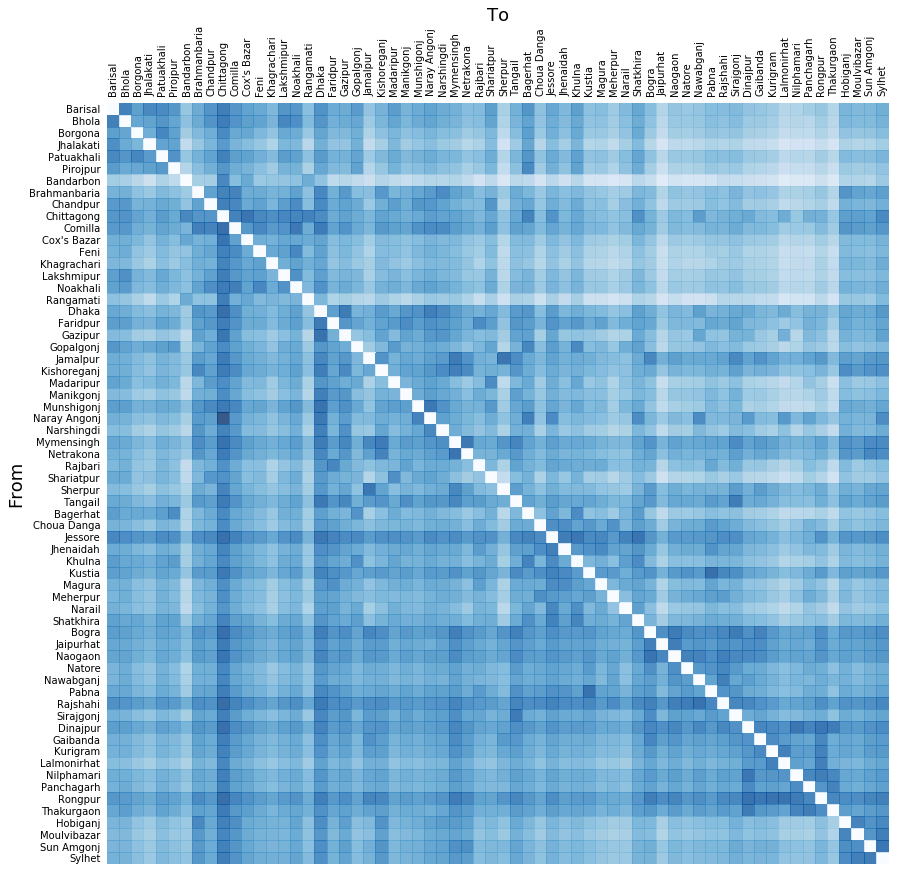

In [34]:
net_v.plot_od_heatmap(OD_df = OD_all, gdf_points = gdf_points, log=True, logn=5)
plt.savefig('OD_all_log5.png', dpi=400)

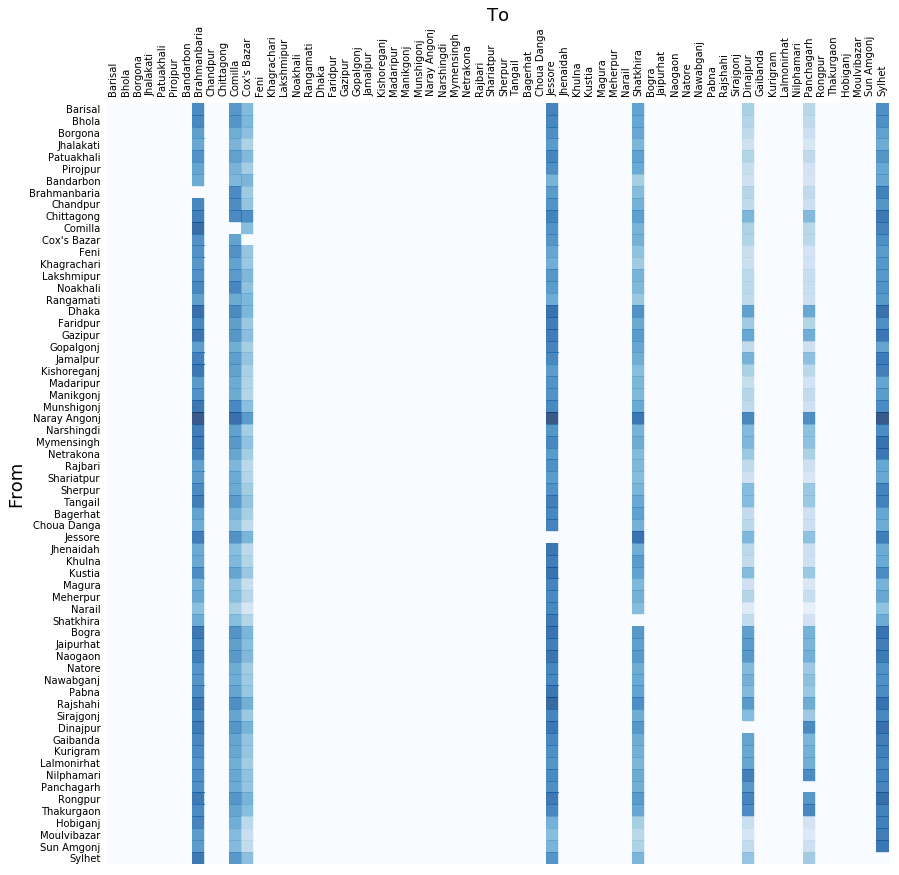

In [35]:
net_v.plot_od_heatmap(OD_df = OD_land_export, gdf_points = gdf_points, log=True, logn=10)
plt.savefig('OD_land_export_log10.png', dpi=400)

# 5. Production and Attraction Pattern

('maximum number of Population_M is', 12.043977)


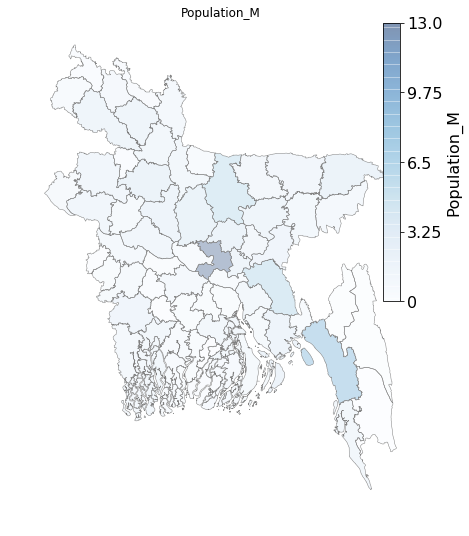

In [63]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Population_M', cmap='Blues', maxpop=13)
# plt.savefig('Population_Million.png', dpi=400)

('maximum number of Bricks_ton is', 32194.05385)


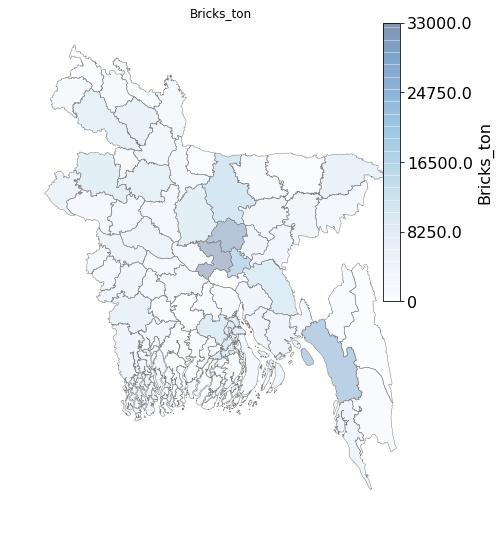

In [64]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Bricks_ton', cmap='Blues', maxpop=33000)
# plt.savefig('Bricks_ton.png', dpi=400)

('maximum number of Flour_mill is', 856)


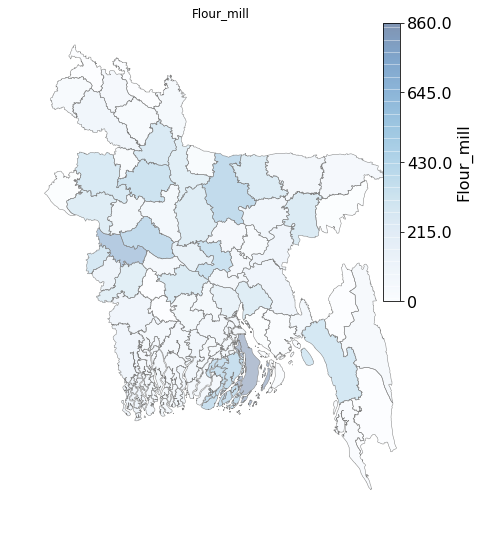

In [65]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Flour_mill', cmap='Blues', maxpop=860)
# plt.savefig('Flour_mill.png', dpi=400)

('maximum number of Fruits_ton is', 768841.72660000005)


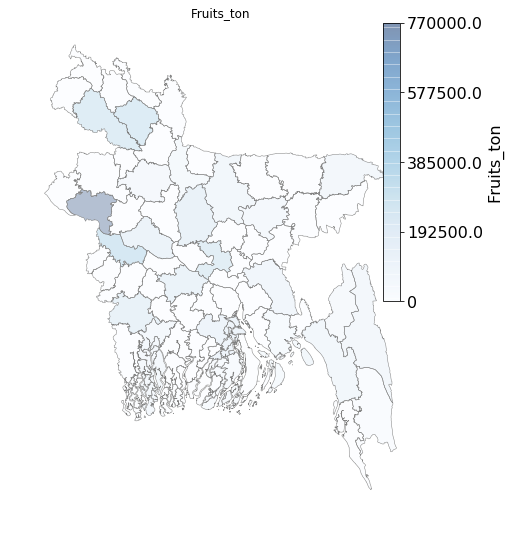

In [66]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Fruits_ton', cmap='Blues', maxpop=770000)
# plt.savefig('Fruits_ton.png', dpi=400)

('maximum number of Tot_Garment_Factory is', 16267)


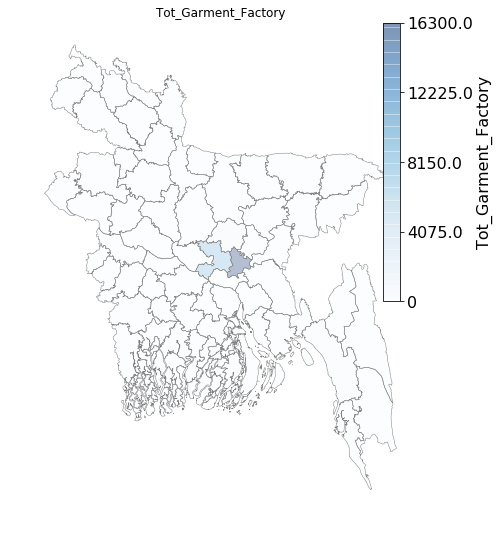

In [67]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Tot_Garment_Factory', cmap='Blues', maxpop=16300)
# plt.savefig('Tot_Garment_Factory.png', dpi=400)

('maximum number of Garment_ton is', 2135891.7439999999)


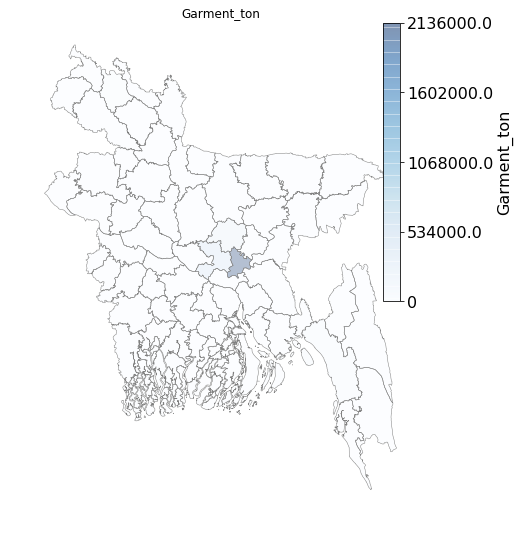

In [68]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Garment_ton', cmap='Blues', maxpop=2136000)
# plt.savefig('Garment_ton.png', dpi=400)

('maximum number of Household is', 2786133)


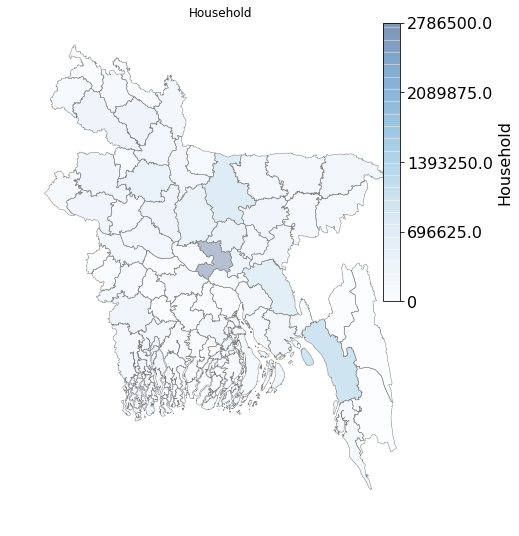

In [69]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Household', cmap='Blues', maxpop=2786500)
# plt.savefig('Household.png', dpi=400)

('maximum number of Jute_mill is', 14)


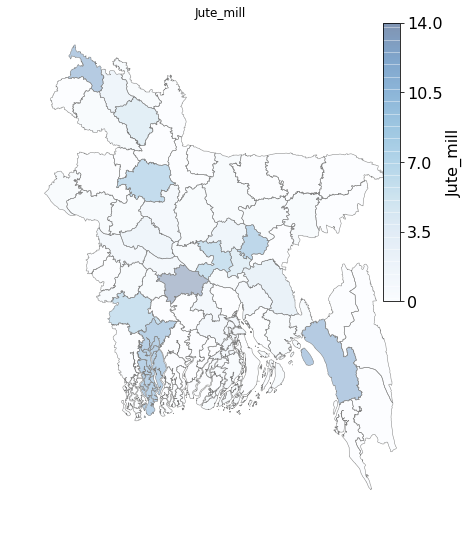

In [70]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Jute_mill', cmap='Blues', maxpop=14)
# plt.savefig('Jute_mill.png', dpi=400)

('maximum number of Jute_ton is', 17318.518519999998)


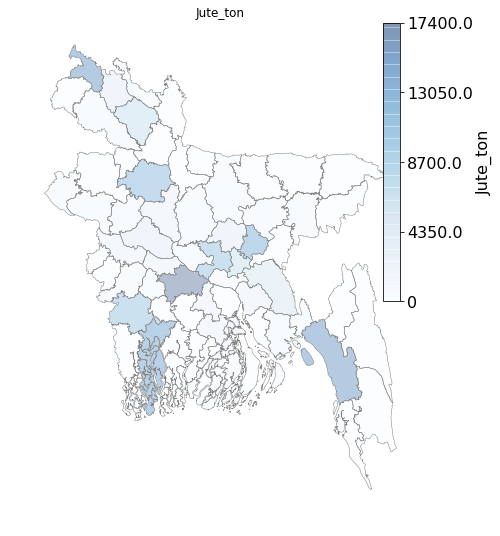

In [71]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Jute_ton', cmap='Blues', maxpop=17400)
# plt.savefig('Jute_ton.png', dpi=400)

('maximum number of Potatoes_ton is', 1143000)


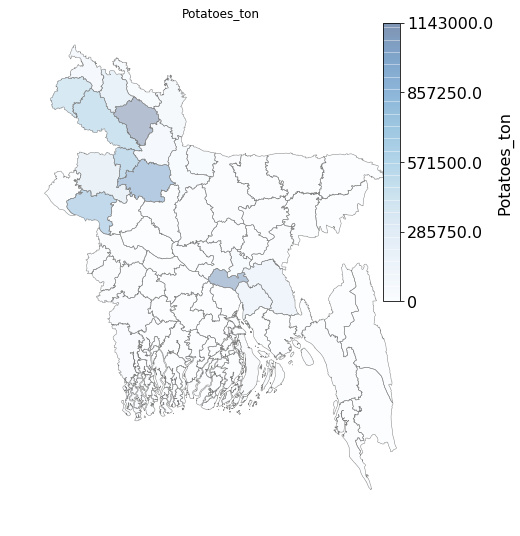

In [72]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Potatoes_ton', cmap='Blues', maxpop=1143000)
# plt.savefig('Potatoes_ton.png', dpi=400)

('maximum number of RawJute_loc_ton is', 127385.0)


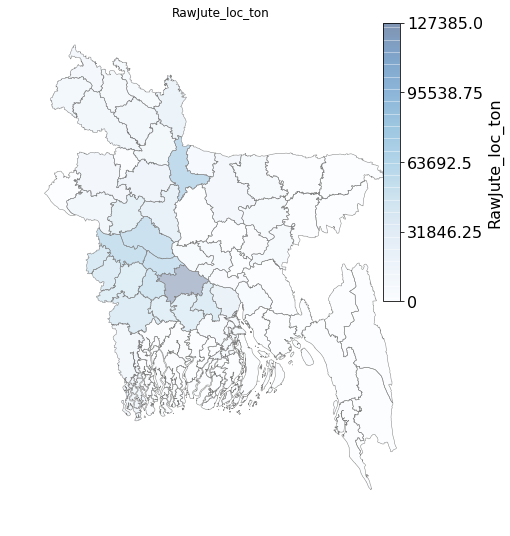

In [73]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='RawJute_loc_ton', cmap='Blues', maxpop=127385.0)
# plt.savefig('RawJute_loc_ton.png', dpi=400)

('maximum number of Rice_ton is', 1586000)


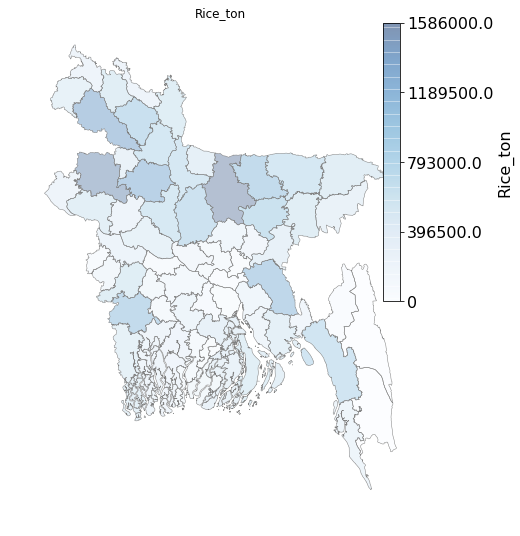

In [74]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Rice_ton', cmap='Blues', maxpop=1586000.0)
# plt.savefig('Rice_ton.png', dpi=400)

('maximum number of Steel_ton is', 1671371.865)


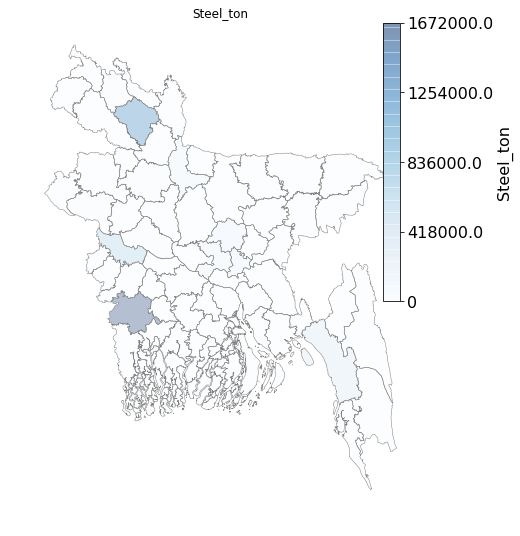

In [75]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Steel_ton', cmap='Blues', maxpop=1672000)
# plt.savefig('Steel_ton.png', dpi=400)

('maximum number of Sugar_ton is', 1057222.2220000001)


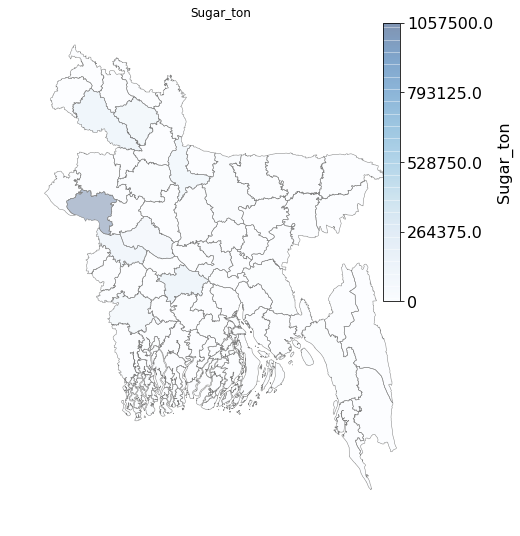

In [76]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Sugar_ton', cmap='Blues', maxpop=1057500)
# plt.savefig('Sugar_ton.png', dpi=400)

('maximum number of Textile_ton is', 95197.512660000008)


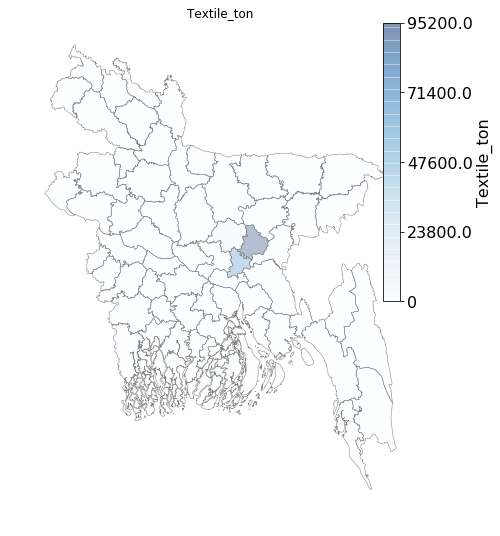

In [77]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Textile_ton', cmap='Blues', maxpop=95200)
# plt.savefig('Textile_ton.png', dpi=400)

('maximum number of Land_throughput is', 1746993)


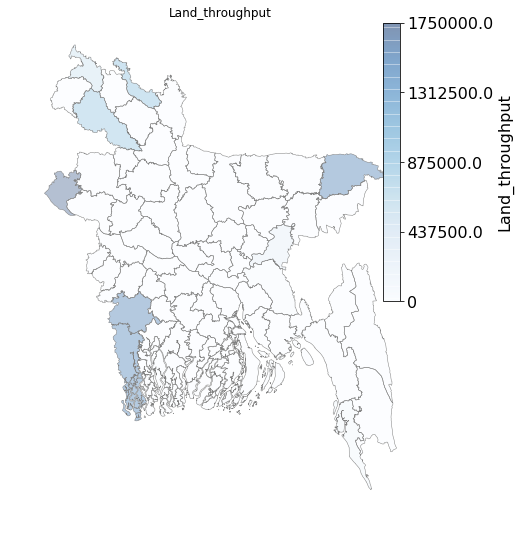

In [38]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Land_throughput', cmap='Blues', maxpop=1750000)
# plt.savefig('Land_exp_ton.png', dpi=400)

('maximum number of Total_export is', 47298000)


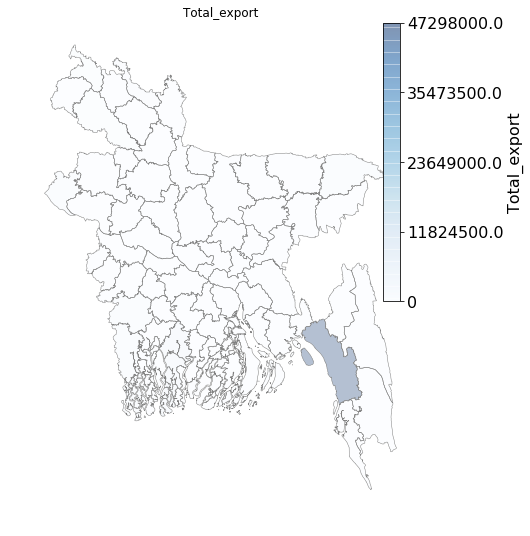

In [39]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Total_export', cmap='Blues', maxpop=5840000)
# plt.savefig('Total_export.png', dpi=400)

('maximum number of Wheat_ton is', 171900)


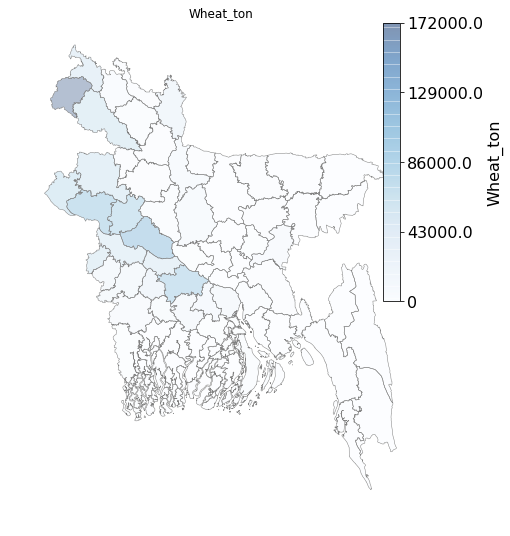

In [80]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Wheat_ton', cmap='Blues', maxpop=172000)
# plt.savefig('Wheat_ton.png', dpi=400)

('maximum number of Total_flow is', 3823893.4100000001)


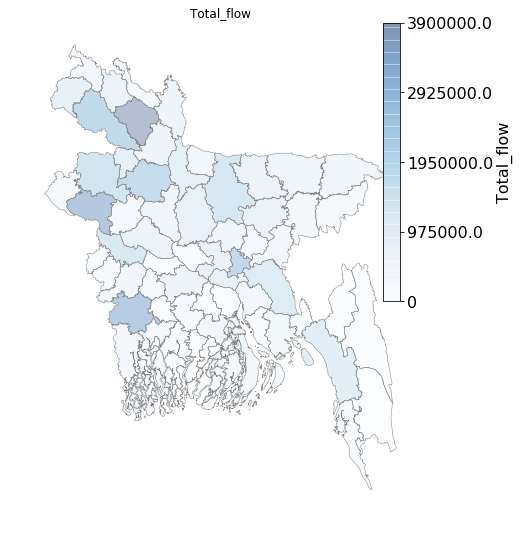

In [81]:
net_v.plot_socioeconomic_attribute(gdf=district_gdf2, colname='Total_flow', cmap='Blues', maxpop=3900000)
# plt.savefig('Total_flow.png', dpi=400)